# Validating NN Model

Using validation curves to validate the model performance 

In [1]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.01 using Gradient Descent

In [2]:
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
lr = 0.01

nn_lr01_gd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)
losses = nn_lr01_gd.train(training_images, training_labels, epochs = 10, batch_size=64) #, debug=True)
nn_lr01_gd_cross_ent_error, nn_lr001_gd_classification_error = nn_lr01_gd.test(test_images, test_labels)

  0%|          | 0/10 [00:00<?, ?it/s]

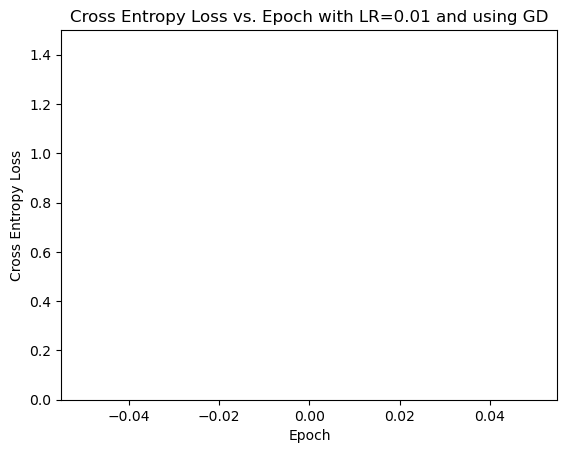

In [ ]:
plt.plot(losses)
plt.ylim(0, 1.5)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.01 and using Mini-batch = 64')
plt.show()

In [ ]:
error_summary = stats.describe(nn_lr01_gd_cross_ent_error)
print("mean: ", np.mean(nn_lr01_gd_cross_ent_error))
print("median: ", np.median(nn_lr01_gd_cross_ent_error))
print("min: ", np.min(nn_lr01_gd_cross_ent_error))
print("max: ", np.max(nn_lr01_gd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr01_gd_cross_ent_error, q=[10, 25, 50, 75, 90]))

mean:  31.635927552112864
median:  31.635927552112864
min:  -0.0
max:  1164.0917368024393


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.01
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, batch_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


1it [00:05,  5.35s/it][00:00<?, ?it/s]
1it [00:05,  5.42s/it][00:05<00:48,  5.35s/it]
1it [00:05,  5.81s/it][00:10<00:43,  5.40s/it]
1it [00:05,  5.82s/it][00:16<00:39,  5.59s/it]
1it [00:05,  5.29s/it][00:22<00:34,  5.68s/it]
1it [00:06,  6.22s/it][00:27<00:27,  5.55s/it]
1it [00:07,  7.38s/it][00:33<00:23,  5.78s/it]
1it [00:07,  7.52s/it][00:41<00:18,  6.30s/it]
1it [00:07,  7.85s/it][00:48<00:13,  6.69s/it]
1it [00:07,  7.31s/it][00:56<00:07,  7.06s/it]
100%|██████████| 10/10 [01:04<00:00,  6.40s/it]


Training complete.

Test set: Average loss: 2.3110, Accuracy: 981/10000 (10%)



In [ ]:

##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

In [ ]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

mean:  2.3110287109375
median:  2.3110287109375
min:  2.3110287109375
max:  2.3110287109375
